<a href="https://colab.research.google.com/github/Jayamurthy21/Nm-projects/blob/main/phase_2_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving recommend (2).py to recommend (2) (1).py


In [ ]:
import pandas as pd

In [ ]:
import io

# If you intend to import the file and execute it
!python recommend (2) (1).py

# If you intend to read it as text and store it in a dataframe
df = pd.read_csv(io.BytesIO(uploaded['recommend (2) (1).py']), sep='\t', header=None) # Assuming tab separated and no header

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `python recommend (2) (1).py'


In [ ]:
df.head

<bound method NDFrame.head of                                                     0
0                                 import pandas as pd
1   from sklearn.metrics.pairwise import cosine_si...
2                                         # Load data
3                    users = pd.read_csv('users.csv')
4                  movies = pd.read_csv('movies.csv')
5                ratings = pd.read_csv('ratings.csv')
6                   # Merge ratings with movie genres
7     data = pd.merge(ratings, movies, on='movie_id')
8                             # Get user ID from name
9                              def get_user_id(name):
10      row = users[users['name'].str.lower() == n...
11      return row.iloc[0]['user_id'] if not row.e...
12                  # Build user profile from ratings
13                   def build_user_profile(user_id):
14       user_data = data[data['user_id'] == user_id]
15                                if user_data.empty:
16          print(f"No ratings found for user ID {...
17                                 return pd.Series()
18      genre_matrix = user_data['genres'].str.get...
19      weights = user_data['rating'].values.resha...
20      profile = genre_matrix.mul(weights.flatten...
21                                     return profile
22              # Recommend movies for a matched pair
23  def recommend_for_match(user1_id, user2_id, to...
24            profile1 = build_user_profile(user1_id)
25            profile2 = build_user_profile(user2_id)
26               if profile1.empty or profile2.empty:
27                              return pd.DataFrame()
28       combined_profile = (profile1 + profile2) / 2
29      movie_genres = movies['genres'].str.get_du...
30      similarity_scores = cosine_similarity([com...
31           movies['similarity'] = similarity_scores
32      already_watched = ratings[(ratings['user_i...
33      recommended = movies[~movies['movie_id'].i...
34      return recommended[['title', 'genres', 'si...
35                                     # Main program
36                         if __name__ == "__main__":
37        name1 = input("Enter name of first user: ")
38       name2 = input("Enter name of second user: ")
39                           id1 = get_user_id(name1)
40                           id2 = get_user_id(name2)
41                     if id1 is None or id2 is None:
42          print("One or both names not found in ...
43                                              else:
44          recommendations = recommend_for_match(...
45                          if recommendations.empty:
46              print("No movie recommendations av...
47                                              else:
48              print(f"\nTop Movie Recommendation...
49              print(recommendations.to_string(in...>

Welcome to the Movie Recommender System!
Enter your preferred genre (e.g., Sci-Fi, Action, Drama, etc.): Horror
Enter your minimum acceptable movie rating (1-10): 9
Sorry, no movies found that match your preferences.


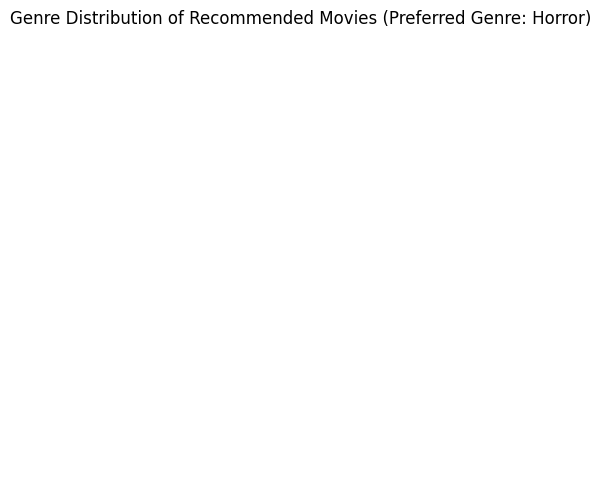

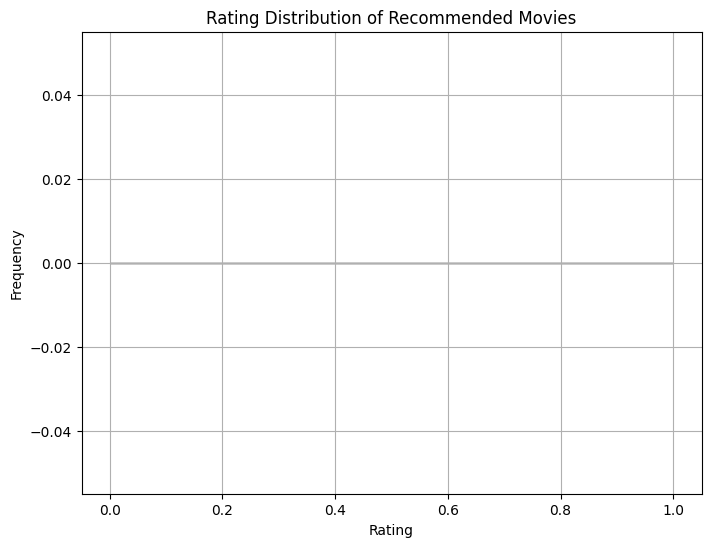


Percentage Table:
         Category  Count  Percentage
0  Matched Movies      0         0.0
1    Total Movies     11       100.0


In [1]:

import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
import random
import os

# Sample movie database (can be expanded)
movies = [
    {"title": "Inception", "genre": "Sci-Fi", "rating": 8.8, "year": 2010},
    {"title": "The Dark Knight", "genre": "Action", "rating": 9.0, "year": 2008},
    {"title": "Interstellar", "genre": "Sci-Fi", "rating": 8.6, "year": 2014},
    {"title": "The Matrix", "genre": "Sci-Fi", "rating": 8.7, "year": 1999},
    {"title": "The Godfather", "genre": "Crime", "rating": 9.2, "year": 1972},
    {"title": "Pulp Fiction", "genre": "Crime", "rating": 8.9, "year": 1994},
    {"title": "Titanic", "genre": "Romance", "rating": 7.8, "year": 1997},
    {"title": "The Shawshank Redemption", "genre": "Drama", "rating": 9.3, "year": 1994},
    {"title": "Forrest Gump", "genre": "Drama", "rating": 8.8, "year": 1994},
    {"title": "The Avengers", "genre": "Action", "rating": 8.0, "year": 2012},
    {"title": "Avatar", "genre": "Sci-Fi", "rating": 7.8, "year": 2009}
]

# Function to ask for user preferences
def get_user_preferences():
    print("Welcome to the Movie Recommender System!")
    preferred_genre = input("Enter your preferred genre (e.g., Sci-Fi, Action, Drama, etc.): ").capitalize()
    min_rating = float(input("Enter your minimum acceptable movie rating (1-10): "))

    return preferred_genre, min_rating

# Function to recommend movies based on preferences
def recommend_movies(preferred_genre, min_rating):
    recommended_movies = []

    # Loop through the movie list and apply filters
    for movie in movies:
        if movie["genre"] == preferred_genre and movie["rating"] >= min_rating:
            recommended_movies.append(movie)

    return recommended_movies

# Function to generate movie poster images (placeholder images)
def generate_movie_image(movie_title):
    # Create a blank image with white background
    img = Image.new('RGB', (200, 300), color='gray')
    d = ImageDraw.Draw(img)

    # Add text to simulate a movie poster
    font = ImageFont.load_default()  # You can load a custom font if desired
    text = movie_title
    text_width, text_height = d.textsize(text, font=font)

    # Calculate position to center the text
    position = ((200 - text_width) // 2, (300 - text_height) // 2)

    # Add the text to the image
    d.text(position, text, font=font, fill="black")

    # Save the image to the 'images' directory
    if not os.path.exists('images'):
        os.makedirs('images')

    # Randomize the filename to avoid overwriting
    image_path = f'images/{movie_title.replace(" ", "_")}_{random.randint(1, 1000)}.png'
    img.save(image_path)

    return image_path

# Function to display recommended movies with poster images
def display_recommendations(recommended_movies):
    if not recommended_movies:
        print("Sorry, no movies found that match your preferences.")
    else:
        print("\nHere are your personalized movie recommendations:")
        for movie in recommended_movies:
            print(f"- {movie['title']} ({movie['year']}) - Rating: {movie['rating']}/10")
            # Generate a placeholder image for each movie
            image_path = generate_movie_image(movie['title'])
            print(f"Image generated at: {image_path}")

# Function to generate visualizations (pie chart, histogram, percentage table)
def generate_visualizations(recommended_movies, preferred_genre):
    # Pie Chart: Distribution of genres in the recommended movies
    genre_counts = pd.Series([movie['genre'] for movie in recommended_movies]).value_counts()

    plt.figure(figsize=(8, 6))
    genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=False)
    plt.title(f"Genre Distribution of Recommended Movies (Preferred Genre: {preferred_genre})")
    plt.ylabel('')
    plt.show()

    # Histogram: Distribution of movie ratings in the recommended list
    ratings = [movie['rating'] for movie in recommended_movies]

    plt.figure(figsize=(8, 6))
    plt.hist(ratings, bins=5, edgecolor='black')
    plt.title("Rating Distribution of Recommended Movies")
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    # Percentage Table: Showing percentage of movies matching genre and rating
    total_movies = len(movies)
    matched_movies = len(recommended_movies)
    percentage_match = (matched_movies / total_movies) * 100

    data = {'Category': ['Matched Movies', 'Total Movies'],
            'Count': [matched_movies, total_movies],
            'Percentage': [percentage_match, 100.0]}

    df = pd.DataFrame(data)
    print("\nPercentage Table:")
    print(df)

# Main function that ties everything together
def main():
    preferred_genre, min_rating = get_user_preferences()
    recommended_movies = recommend_movies(preferred_genre, min_rating)
    display_recommendations(recommended_movies)
    generate_visualizations(recommended_movies, preferred_genre)

if __name__ == "__main__":
    main()